In [1]:
import os
import cv2
import pandas
from matplotlib import style
import seaborn as sns
import itertools
import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt # Library for plotting the images and the loss function
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,roc_curve
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,Adagrad,RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow
import tensorflow as tf # We import the data set from tensorflow and build the model there
import fnmatch
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten,Dropout,BatchNormalization

In [2]:
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
#/ADRIANA_LIMA

In [3]:
print(os.listdir('C:/Users/Ahmed Wanas/Downloads/classes/binary_class'))

['Adriana Lima', 'Alex Lawther', 'Bill Gates', 'Rami Malik', 'Rihanna']


In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
X=[]
Z=[]
IMG_SIZE=150
ADRIANA_LIMA='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Adriana Lima'
ALEX_LAWTHER='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Alex Lawther'
BILL_GATES='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Bill Gates'
RIHANNA='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Rihanna'
RAMI_MALEK='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Rami Malik'

In [6]:
def assign_label(img,name):
    return name
IMG_SIZE=50

In [7]:
def make_train_data(name,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img,'*jpg'):
            label=assign_label(img,name)
            path=os.path.join(DIR,img)
            img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))

In [8]:
make_train_data('Adriana Lima',ADRIANA_LIMA)
print(len(X))



100%|██████████| 213/213 [00:03<00:00, 55.43it/s]

213


In [9]:
make_train_data('Alex Lawther',ALEX_LAWTHER)
print(len(X))

100%|██████████| 152/152 [00:02<00:00, 65.44it/s]

365


In [10]:
make_train_data('Bill Gates',BILL_GATES)
print(len(X))

100%|██████████| 122/122 [00:01<00:00, 83.03it/s] 

487


In [11]:
make_train_data('Rihanna',RIHANNA)
print(len(X))

100%|██████████| 133/133 [00:01<00:00, 90.03it/s]

620


In [12]:
make_train_data('Rami Malik',RAMI_MALEK)
print(len(X))

100%|██████████| 160/160 [00:02<00:00, 77.97it/s]

780


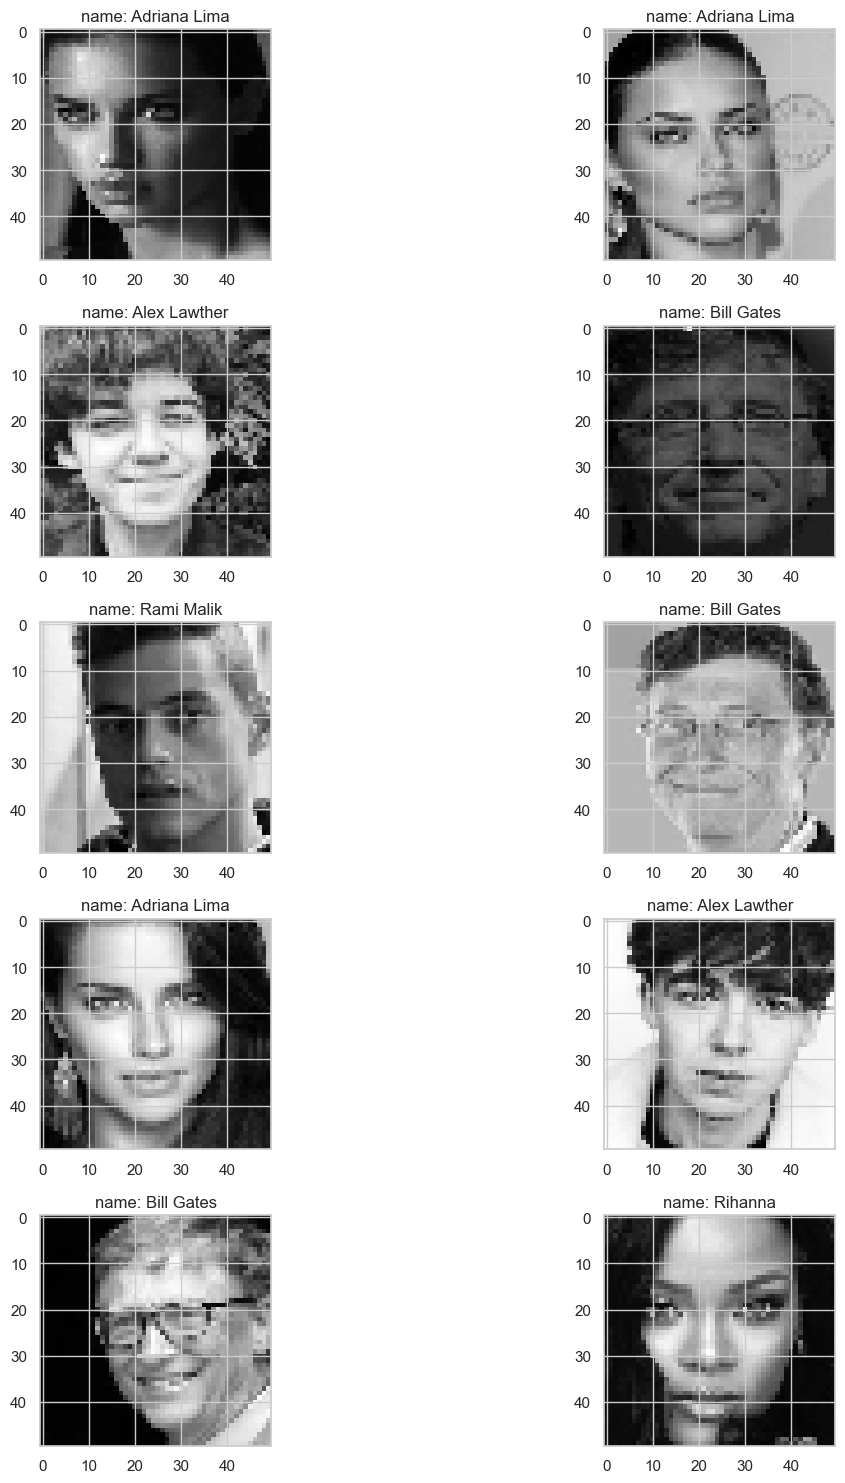

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l],cmap='gray')
        ax[i,j].set_title('name: '+Z[l])
plt.tight_layout()        
    

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255.0



In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=( 50, 50,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [18]:
batch_size=128
epochs=1
from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=.1)



In [19]:
datagen=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                          featurewise_std_normalization=False,
                          samplewise_std_normalization=False,
                          zca_whitening=False,
                          rotation_range=10,
                          zoom_range=.1,
                          width_shift_range=.2,
                          height_shift_range=.2,
                          horizontal_flip=True,
                          vertical_flip=False)

datagen.fit(x_train)

In [20]:
model.compile(optimizer=Adam(lr=.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size)
                    ,epochs=130
                    ,validation_data=(x_test,y_test),
                    verbose=1
                   )


Epoch 1/130
5/5 [==============================] - 12s 2s/step - loss: 1.6022 - accuracy: 0.2410 - val_loss: 1.5872 - val_accuracy: 0.2718
Epoch 2/130
5/5 [==============================] - 5s 1s/step - loss: 1.5843 - accuracy: 0.2735 - val_loss: 1.5692 - val_accuracy: 0.2718
Epoch 3/130
5/5 [==============================] - 7s 1s/step - loss: 1.5711 - accuracy: 0.2786 - val_loss: 1.5301 - val_accuracy: 0.2769
Epoch 4/130
5/5 [==============================] - 7s 1s/step - loss: 1.5417 - accuracy: 0.3077 - val_loss: 1.4326 - val_accuracy: 0.4103
Epoch 5/130
5/5 [==============================] - 8s 2s/step - loss: 1.4835 - accuracy: 0.3538 - val_loss: 1.3186 - val_accuracy: 0.4821
Epoch 6/130
5/5 [==============================] - 8s 1s/step - loss: 1.3960 - accuracy: 0.3915 - val_loss: 1.2091 - val_accuracy: 0.5385
Epoch 7/130
5/5 [==============================] - 7s 1s/step - loss: 1.3968 - accuracy: 0.4068 - val_loss: 1.2655 - val_accuracy: 0.4821
Epoch 8/130
5/5 [================

In [22]:
model.evaluate(x_test,y_test,batch_size=128)

2/2 [==============================] - 0s 63ms/step - loss: 0.2688 - accuracy: 0.9077


[0.2687545418739319, 0.9076923131942749]

In [23]:
model.predict(x_test)

7/7 [==============================] - 1s 31ms/step


array([[3.41787308e-01, 1.40190735e-01, 9.83249993e-06, 4.08794582e-01,
        1.09217495e-01],
       [1.14860386e-01, 4.12977533e-04, 2.97299994e-06, 3.43097345e-04,
        8.84380519e-01],
       [4.00780469e-01, 9.66089488e-07, 3.04793730e-06, 1.50949199e-04,
        5.99064589e-01],
       [3.93580971e-03, 1.76370994e-03, 1.45639488e-05, 9.93649304e-01,
        6.36515208e-04],
       [3.37457028e-03, 1.28907454e-08, 1.74360537e-12, 6.75871448e-08,
        9.96625364e-01],
       [9.99903142e-01, 1.07178566e-09, 5.67584987e-14, 3.45048573e-10,
        9.67478918e-05],
       [3.44023050e-08, 6.94493156e-06, 9.99981105e-01, 1.17518566e-05,
        3.32954286e-08],
       [3.70960891e-01, 8.95392243e-03, 1.53754559e-06, 4.56804410e-03,
        6.15515590e-01],
       [6.21302097e-05, 8.59583795e-01, 2.74920519e-02, 3.71564948e-03,
        1.09146334e-01],
       [1.86520927e-02, 1.44406469e-04, 1.42971749e-06, 2.34381863e-04,
        9.80967641e-01],
       [7.71619852e-06, 2.4867